In [1]:
%load_ext autoreload
%autoreload 2

import datamol as dm
dm.disable_rdkit_log()

## Fragmentation

Let's fragment a molecule using multiple methods.

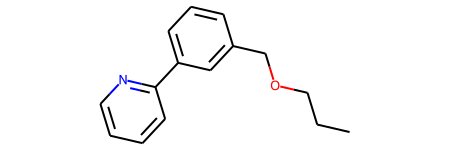

In [2]:
smiles = "CCCOCc1cc(c2ncccc2)ccc1"
mol = dm.to_mol(smiles)
mol

### BRICS

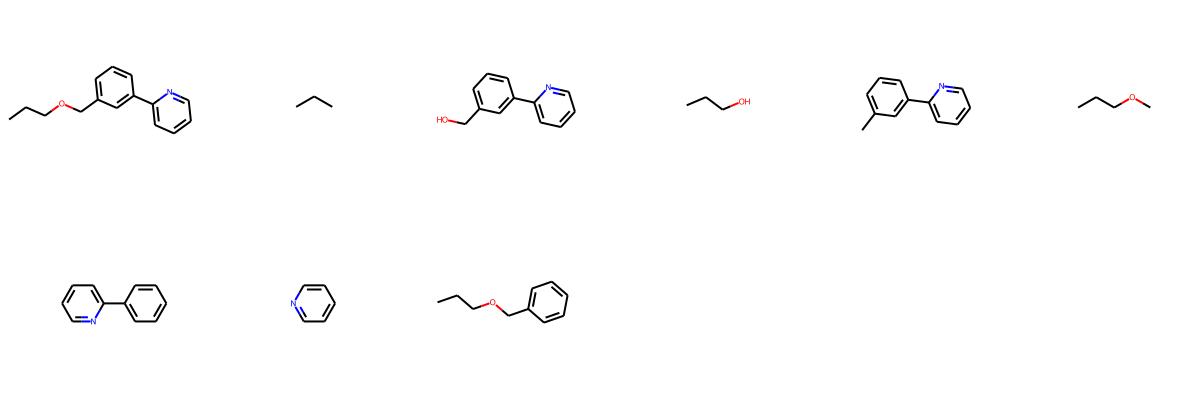

In [3]:
frags = dm.fragment.brics(mol)
dm.viz.to_image(frags, n_cols=6)

### FraggleSim

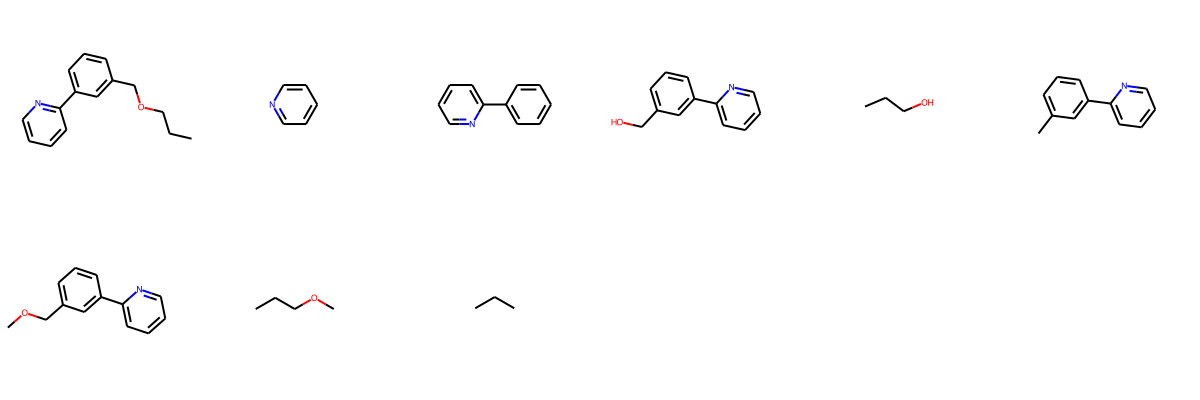

In [4]:
frags = dm.fragment.frag(mol)
dm.viz.to_image(frags, n_cols=6)

### Recap

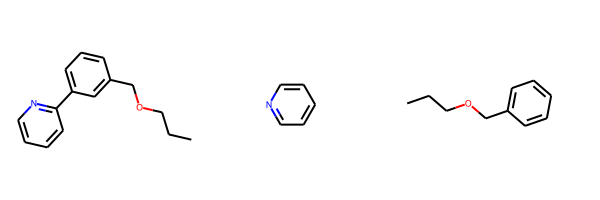

In [5]:
frags = dm.fragment.recap(mol)
dm.viz.to_image(frags, n_cols=6)

### Any break

This method uses BRICS first and fallback to FraggleSim if it doesn't work.

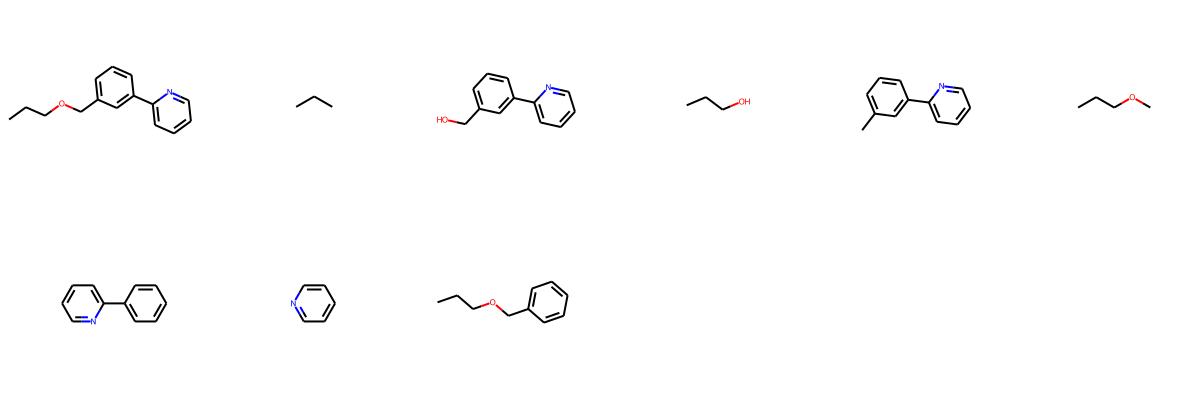

In [6]:
frags = dm.fragment.anybreak(mol)
dm.viz.to_image(frags, n_cols=6)

## Scaffold

Get the scaffolds from a list of molecules.

In [12]:
# Get some mols
data = dm.data.freesolv()
smiles = data["smiles"].iloc[:].tolist()
mols = [dm.to_mol(s) for s in smiles]

scaffolds, scf2infos, scf2groups = dm.scaffold.fuzzy_scaffolding(mols)
list(scaffolds)[:4]

['C1=C([*:4])N([*:3])C(=[*:1])NC1=[*:6]',
 'Cc1cc([*:5])cc2cc([*:2])c([*:3])c([*:4])c12',
 'Cc1cc2c([*:4])c([*:3])c([*:2])cc2c(C)c1[*:5]',
 'c1c([*:7])c2c(c([*:8])c1[*:9])Cc1c(c([*:1])c([*:2])c([*:3])c1[*:4])C2']

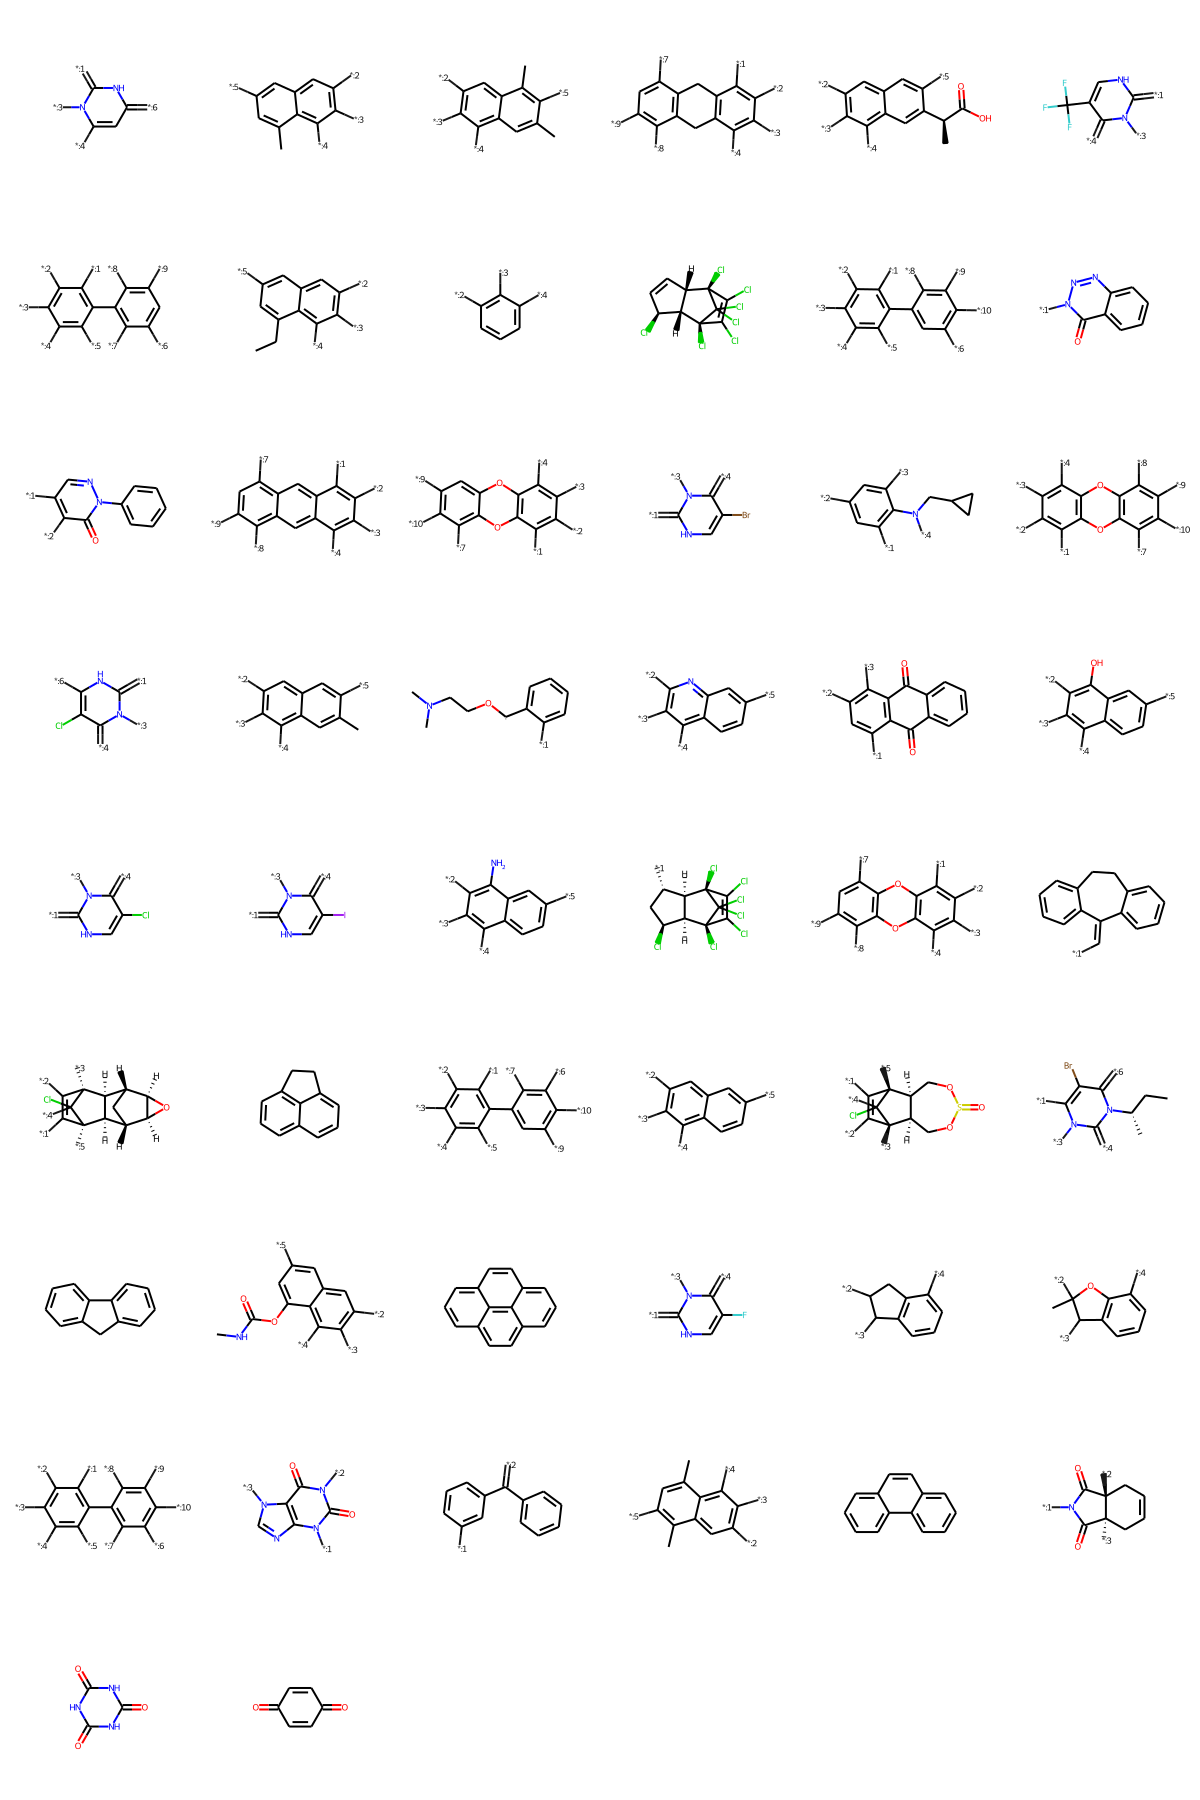

In [13]:
sfs = [dm.to_mol(s) for s in list(scaffolds)]
dm.viz.to_image(sfs, n_cols=6)